# Assignment 2.1: Home Credit Default Risk

The Kaggle dataset on Home Credit Default Risk provides information about the loan applicants' credit bureau data, previous loan records, and other attributes that could influence their ability to repay a loan. The goal is to use this information to predict whether or not an applicant will be able to repay a loan, which is a critical issue for financial services. 

In [40]:
# import libraries

import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)


# Read Dataset

In [41]:
df = pd.read_csv('data/train_data.csv')

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [42]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Drop categorical columns
df_numerical = df.drop(columns=categorical_columns)

df = df_numerical

# Exploratory Data Analysis

In [43]:
df.shape

(153755, 106)

In [44]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,1,157500.0,900000.0,26446.5,900000.0,0.010006,-16180,-2037,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,1,90000.0,733176.0,21438.0,612000.0,0.031329,-14969,-162,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,0,189000.0,1795500.0,62541.0,1795500.0,0.028663,-22213,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,332445,0,0,175500.0,494550.0,45490.5,450000.0,0.004960,-19301,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,357429,0,0,270000.0,1724688.0,54283.5,1575000.0,0.018850,-18409,-886,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,153755.000000,153755.000000,153755.000000,1.537550e+05,1.537550e+05,153750.000000,1.536060e+05,153755.000000,153755.000000,153755.000000,...,153755.000000,153755.000000,153755.000000,153755.000000,132922.000000,132922.000000,132922.000000,132922.000000,132922.000000,132922.000000
mean,277867.616930,0.080726,0.417398,1.692611e+05,5.988824e+05,27083.127015,5.383057e+05,0.020813,-16025.981438,63742.602751,...,0.007909,0.000650,0.000501,0.000416,0.006417,0.006854,0.034012,0.265547,0.267555,1.901777
std,102831.742645,0.272414,0.722523,3.180805e+05,4.023748e+05,14468.883776,3.693544e+05,0.013796,4363.552861,141204.275368,...,0.088579,0.025494,0.022373,0.020398,0.084608,0.110151,0.201581,0.907185,0.941286,1.873638
min,100004.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.500000e+04,0.000290,-25201.000000,-17583.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188542.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19662.000000,-2746.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277749.000000,0.000000,0.000000,1.462500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15725.000000,-1211.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366718.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12399.000000,-290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Inspect dataset for missing data

Drop columns and rows with missing data

<Axes: >

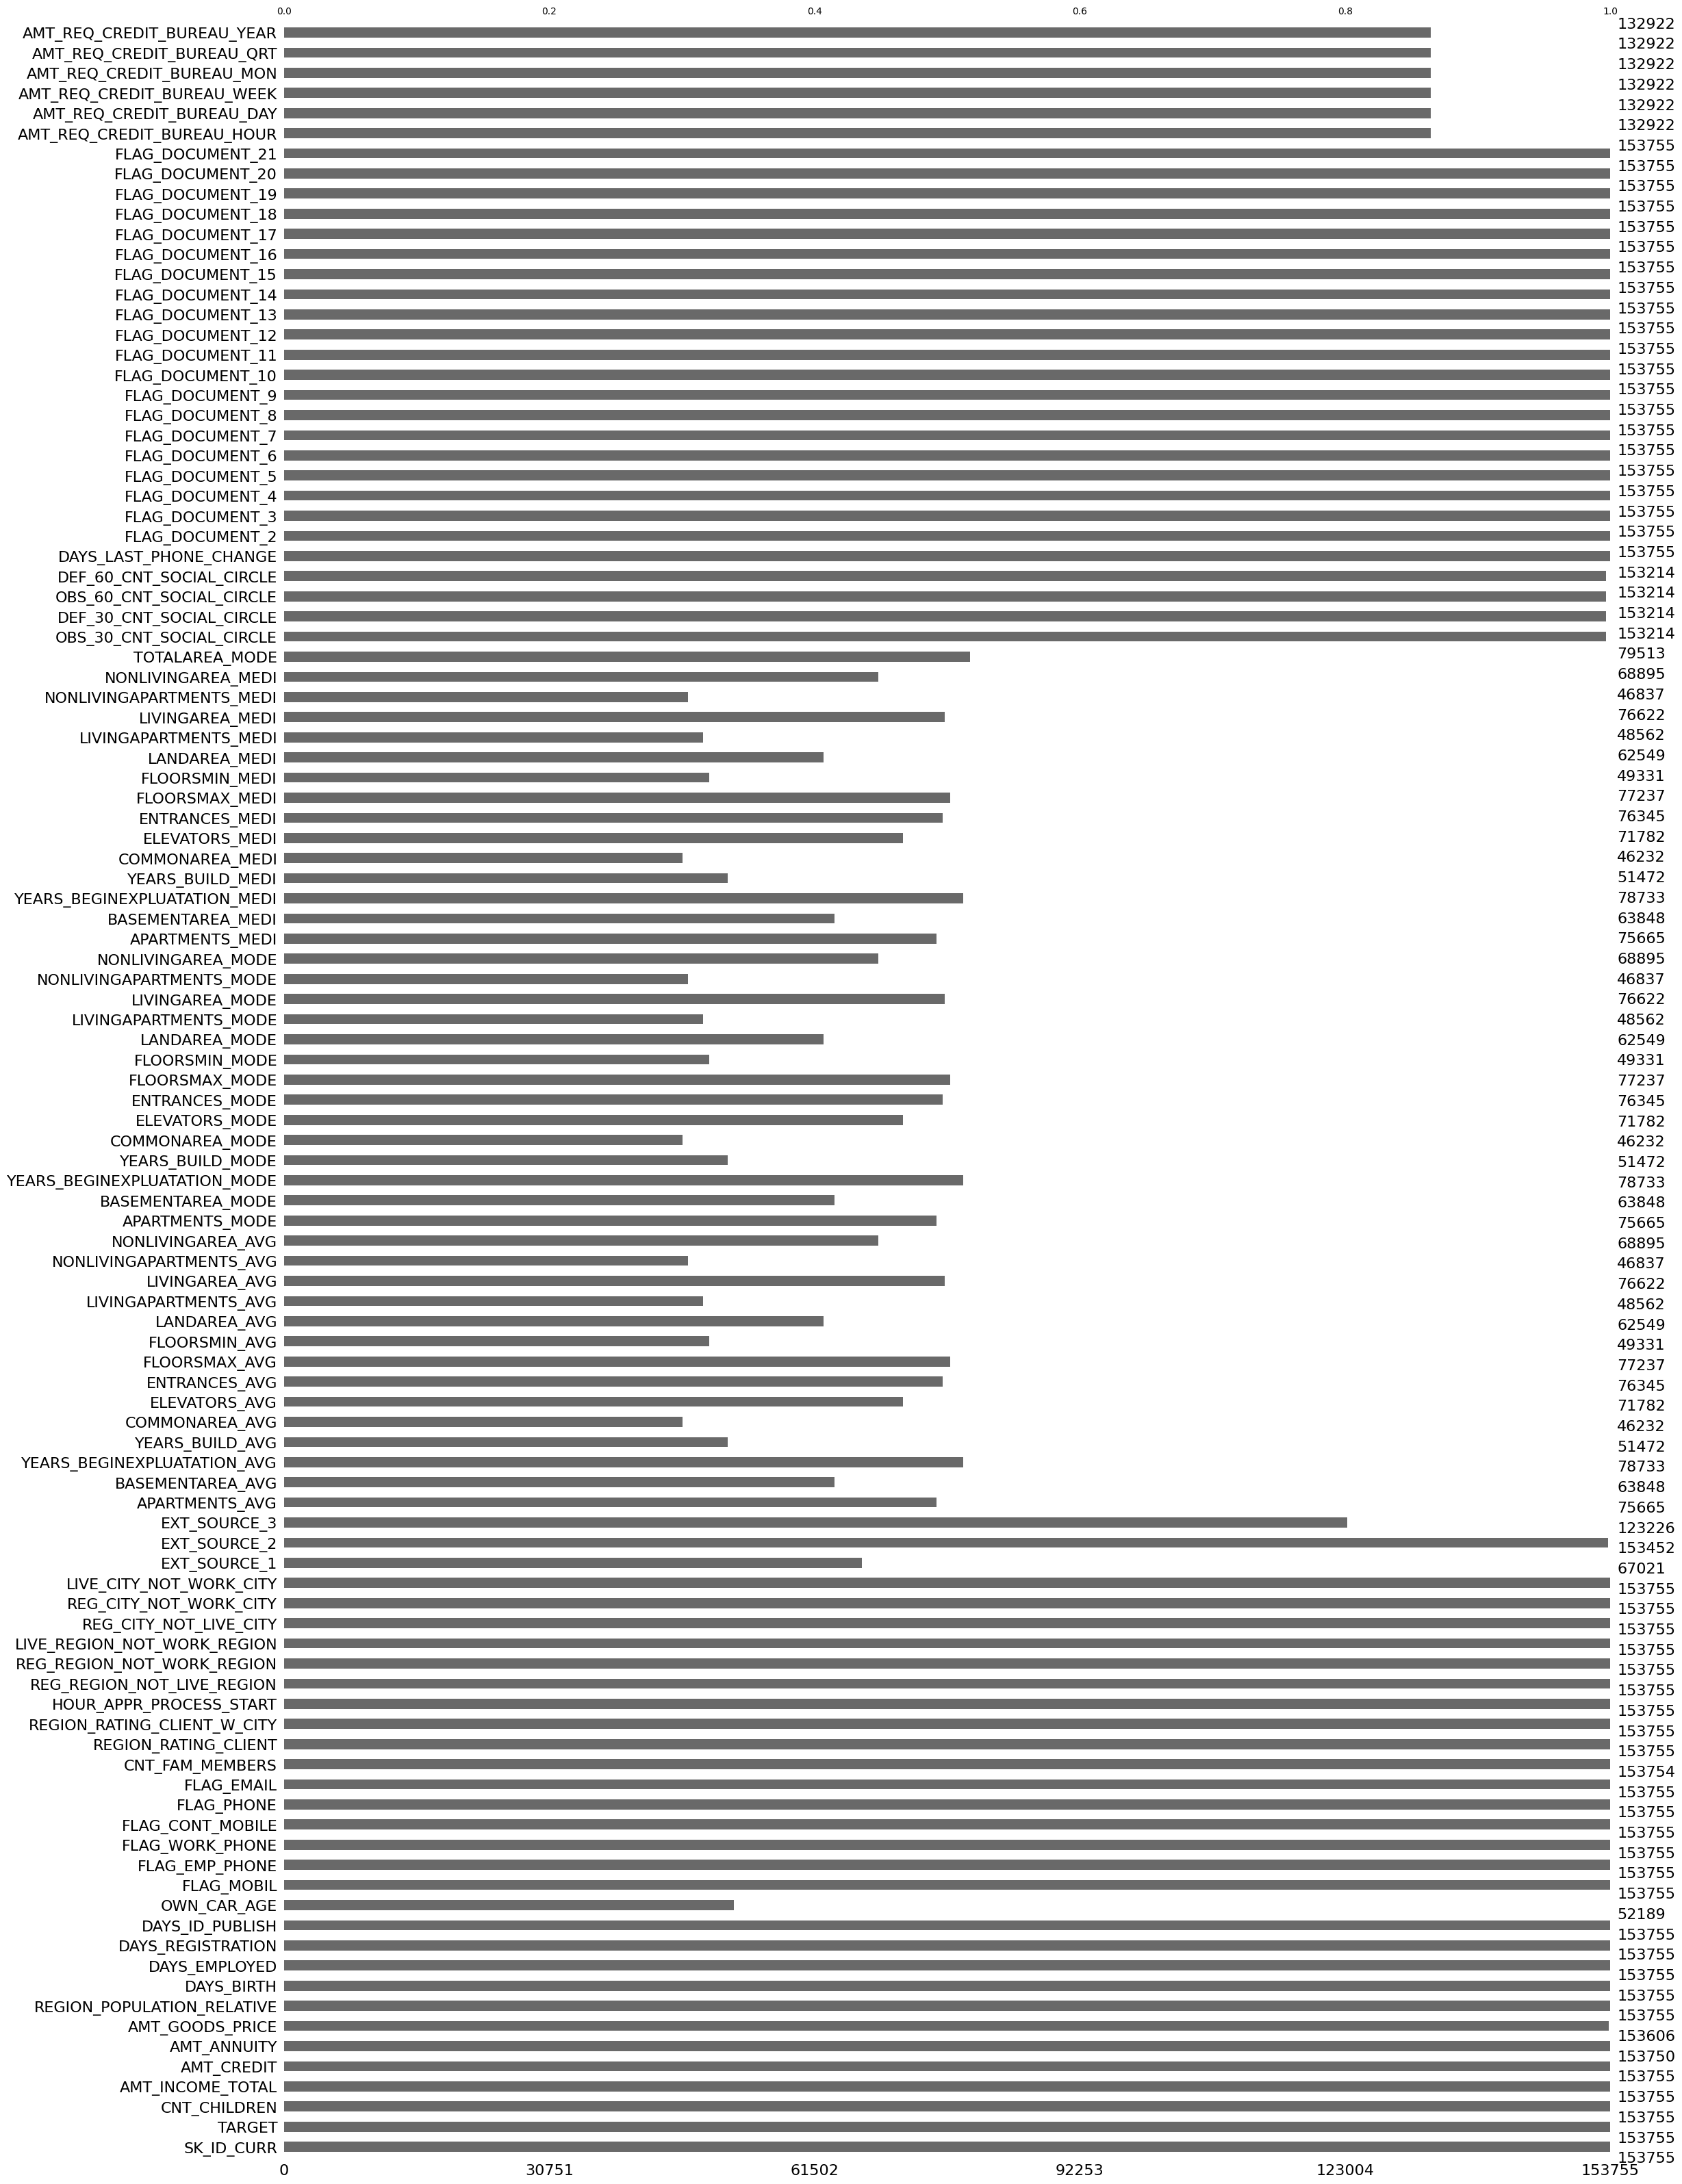

In [46]:
msno.bar(df)

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_29196/3446558635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


(122498, 61)

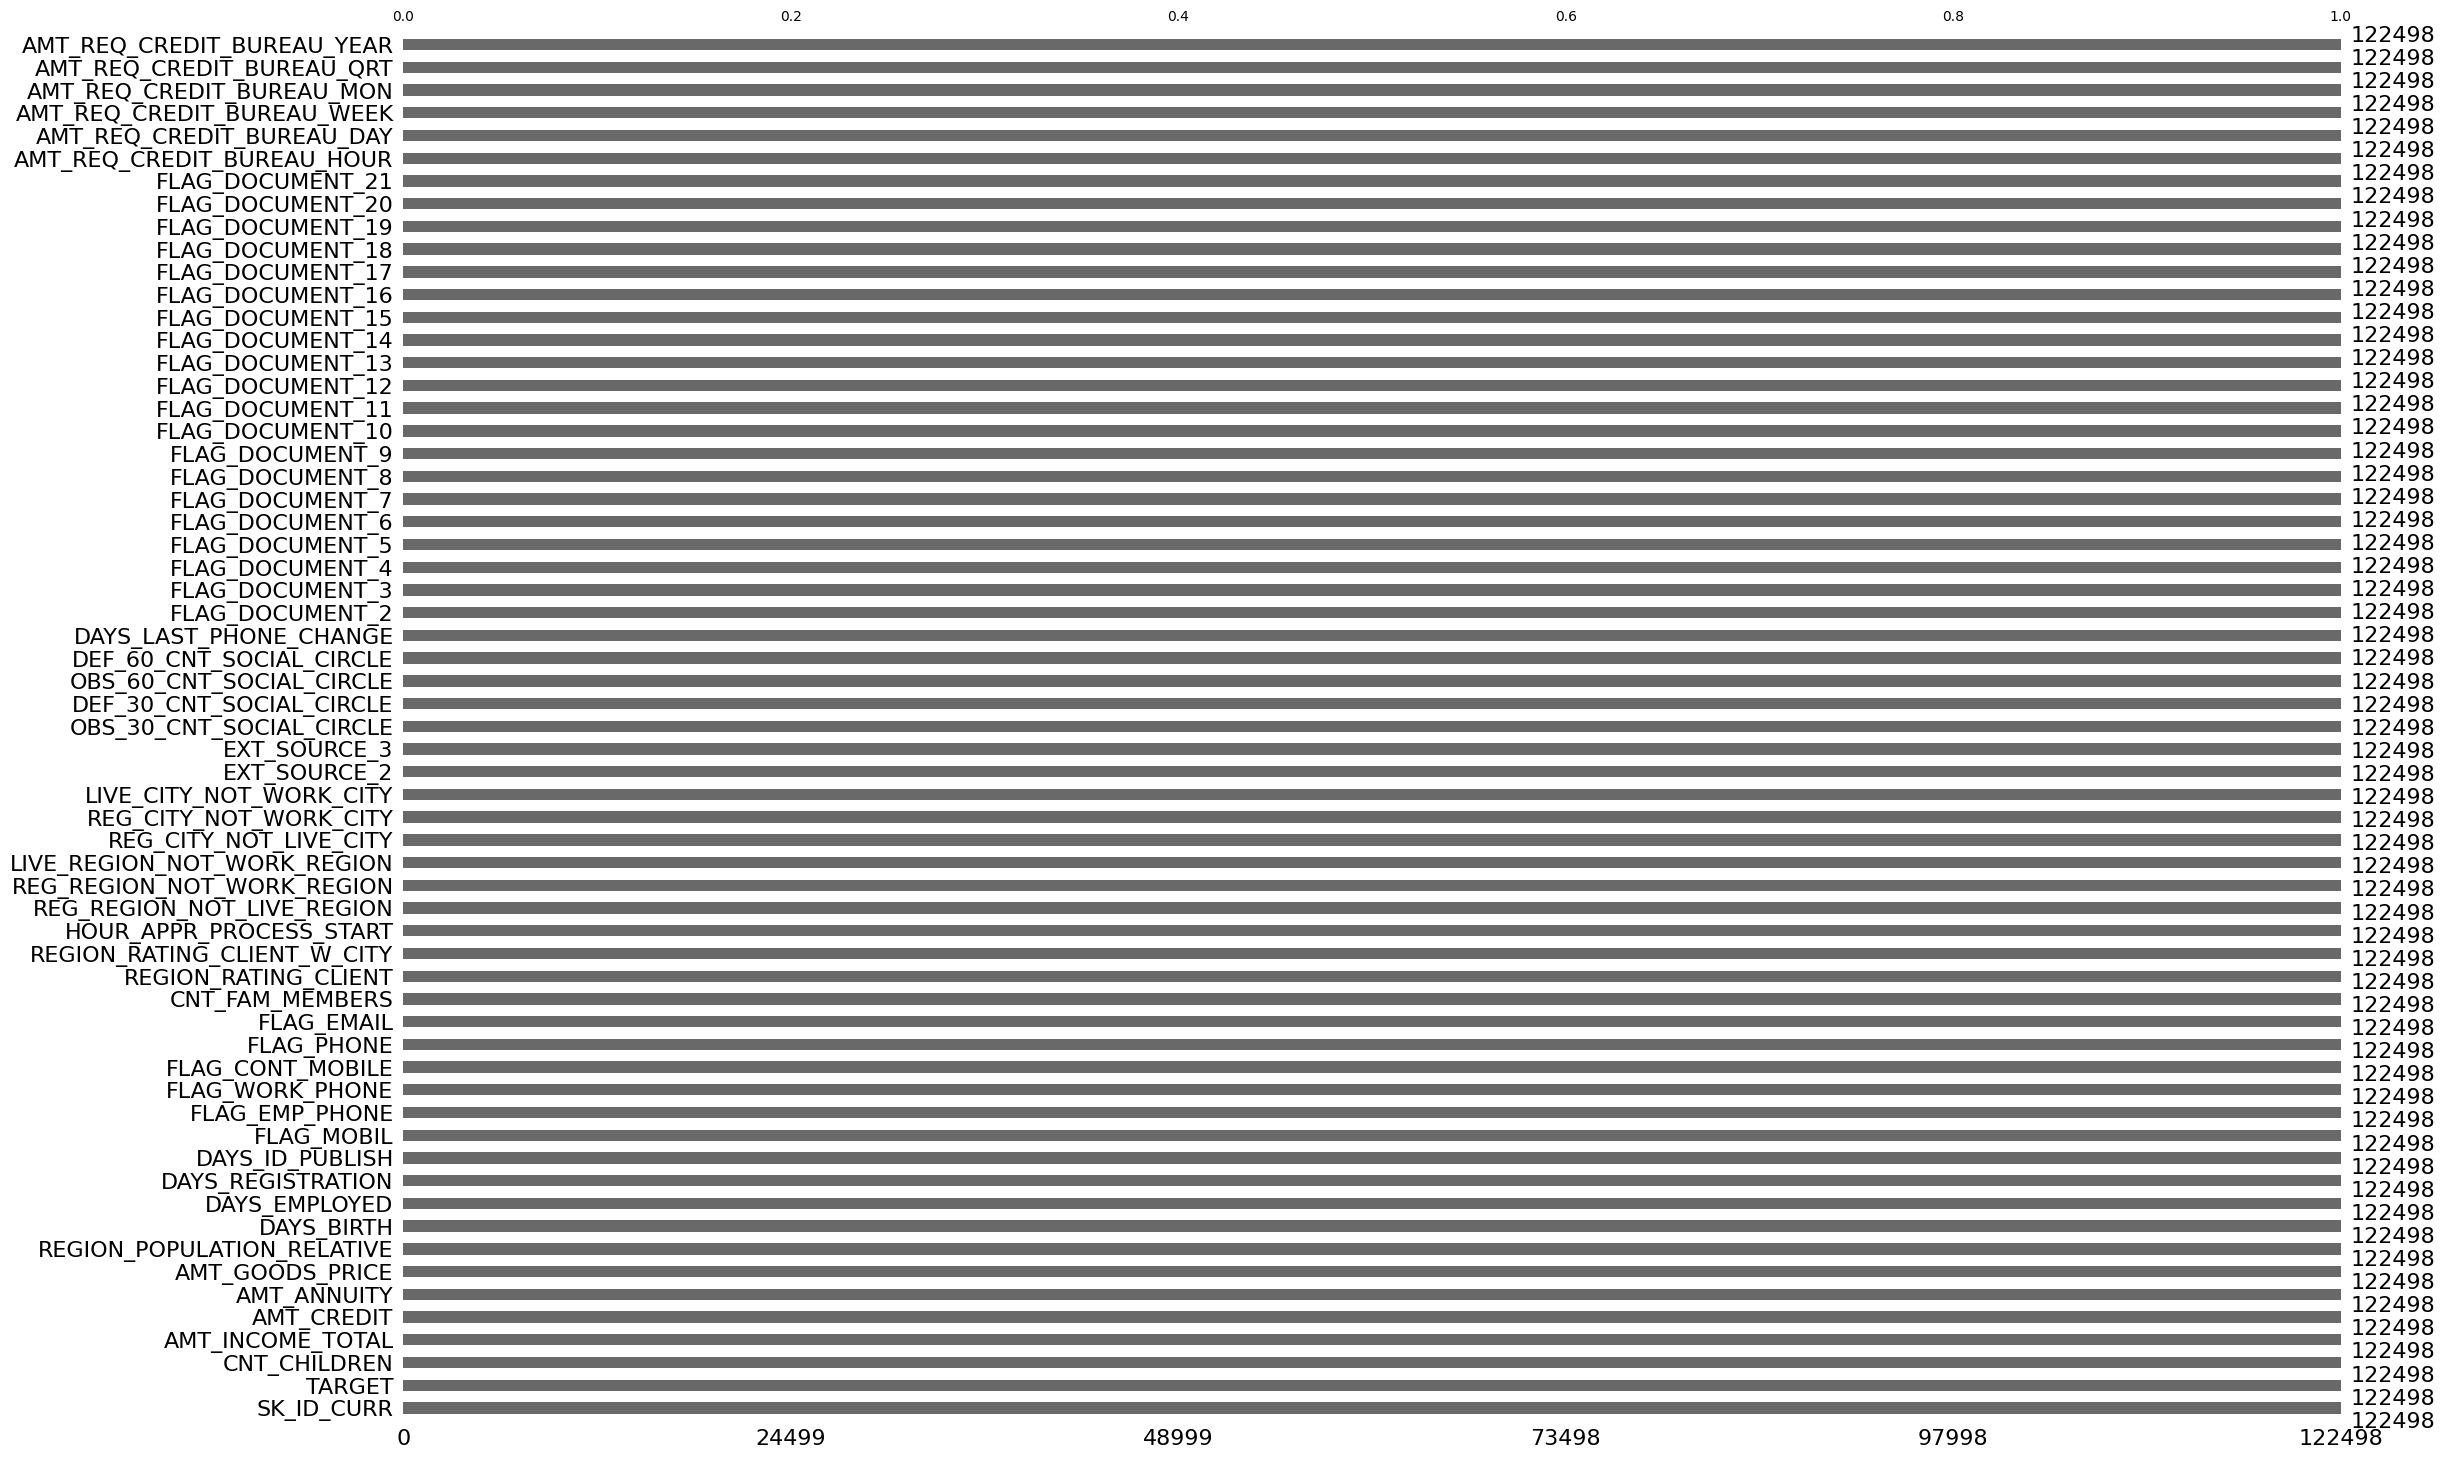

In [48]:
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100

# Filter out columns with more than 50% missing values
columns_to_drop = missing_percent[missing_percent > 25].index
df.drop(columns=columns_to_drop, inplace=True)

df = df.dropna()

# Display the resulting DataFrame
msno.bar(df)

df.shape

# Classification using K-means clustering

In [57]:
from sklearn.preprocessing import StandardScaler # Import for feature standardization
from sklearn.decomposition import PCA

# Remove TARGET
X = df.drop('TARGET', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dataset to the top 10 principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(122498, 10)

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score # For kmeans evaluation

def kmeans_execution(df, num_clust, verbose=False):
    if verbose:
        print(f"Starting k-means clustering with k={num_clust}")
    
    # Create KMeans object
    kmn = KMeans(n_clusters=num_clust, n_init='auto', random_state=0)
    
    if verbose:
        print("Fitting the model to the data...")
    
    # Apply to the data
    kmn.fit(df)
    
    if verbose:
        print("Model fitting complete.")
    
    # Capture K-Means labels
    kmn_lbl = kmn.labels_
    
    if verbose:
        print(f"Labels assigned: {kmn_lbl[:10]}...")  # Show first 10 labels as a sample
    
    # Capture distortion (inertia)
    kmn_distortion = kmn.inertia_
    
    if verbose:
        print(f"Distortion (Inertia): {kmn_distortion}")
    
    return kmn, kmn_lbl, kmn_distortion

kmn_2_mod, kmn_2_labels, kmn_2_dist = kmeans_execution(X_pca, 2, verbose = True)
silhouette_2 = silhouette_score(X_pca, kmn_2_labels)
print(f'k=2 silhouette average score: {silhouette_2}')
kmn_3_mod, kmn_3_labels, kmn_3_dist = kmeans_execution(X_pca, 3, verbose = True)
silhouette_3 = silhouette_score(X_pca, kmn_3_labels)
print(f'k=3 silhouette average score: {silhouette_3}')
kmn_4_mod, kmn_4_labels, kmn_4_dist = kmeans_execution(X_pca, 4, verbose = True)
silhouette_4 = silhouette_score(X_pca, kmn_4_labels)
print(f'k=4 silhouette average score: {silhouette_4}')
kmn_5_mod, kmn_5_labels, kmn_5_dist = kmeans_execution(X_pca, 5, verbose = True)
silhouette_5 = silhouette_score(X_pca, kmn_5_labels)
print(f'k=5 silhouette average score: {silhouette_5}')
kmn_6_mod, kmn_6_labels, kmn_6_dist = kmeans_execution(X_pca, 6, verbose = True)
silhouette_6 = silhouette_score(X_pca, kmn_6_labels)
print(f'k=6 silhouette average score: {silhouette_6}')

Starting k-means clustering with k=2
Fitting the model to the data...
Model fitting complete.
Labels assigned: [1 1 0 0 1 1 1 1 1 1]...
Distortion (Inertia): 2263806.860027661
k=2 silhouette average score: 0.2061311832094
Starting k-means clustering with k=3
Fitting the model to the data...
Model fitting complete.
Labels assigned: [1 2 0 0 1 1 1 1 1 1]...
Distortion (Inertia): 2088146.6609202027
k=3 silhouette average score: 0.19605461832338214
Starting k-means clustering with k=4
Fitting the model to the data...
Model fitting complete.
Labels assigned: [3 2 0 0 1 3 3 3 1 1]...
Distortion (Inertia): 1891036.5209039594
k=4 silhouette average score: 0.18845881766909128
Starting k-means clustering with k=5
Fitting the model to the data...
Model fitting complete.
Labels assigned: [3 4 1 0 1 3 3 3 4 4]...
Distortion (Inertia): 1736385.6861585043
k=5 silhouette average score: 0.16973303414303414
Starting k-means clustering with k=6
Fitting the model to the data...
Model fitting complete.
Lab

Text(0.5, 1.0, 'Elbow curve')

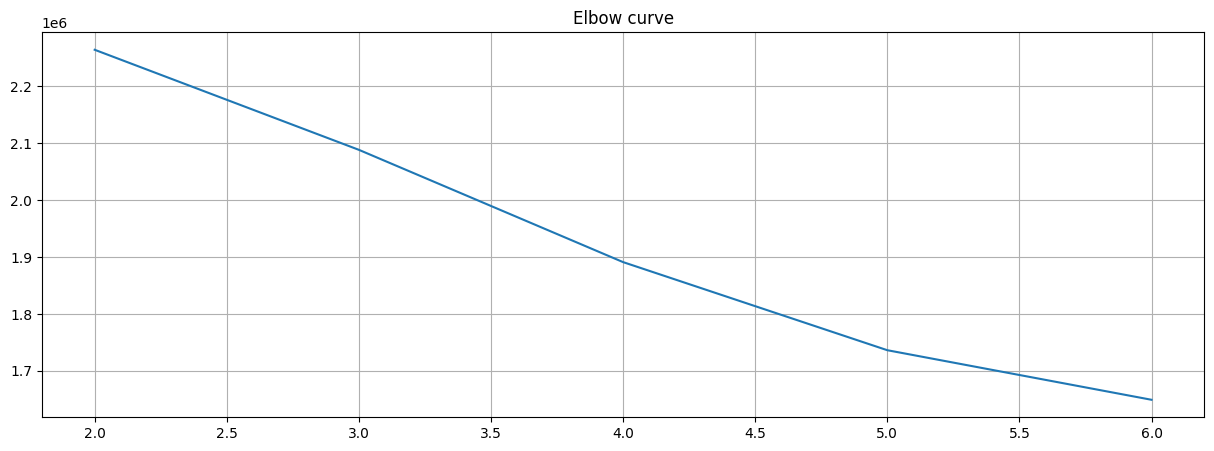

In [67]:
# Elbow Plot - seems like clear "elbow" at k=3

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 7), [kmn_2_dist, kmn_3_dist, kmn_4_dist, kmn_5_dist, kmn_6_dist])
plt.grid(True)
plt.title('Elbow curve')

In [68]:
# Get the PCA components
pca_components = pca.components_

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_components, columns=X.columns)

# Display the first few rows of the PCA components
print("PCA Components (first few rows):")
print(pca_df.head())

# Display the contribution of original features to the first principal component
print("Contribution to the first principal component:")
print(pca_df.iloc[0].sort_values(ascending=False))

# Display the contribution of original features to the second principal component
print("Contribution to the second principal component:")
print(pca_df.iloc[1].sort_values(ascending=False))


PCA Components (first few rows):
   SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0   -0.003896      0.206265          0.046092    0.113762     0.132365   
1    0.000500     -0.107404          0.087848    0.367074     0.343449   
2    0.002940      0.096335          0.027585    0.270131     0.231016   
3   -0.003330     -0.084701         -0.018569   -0.248157    -0.213305   
4    0.001736     -0.163659          0.022881    0.231470     0.196545   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         0.113998                    0.039617    0.348883      -0.414838   
1         0.369993                    0.289600   -0.150028       0.084812   
2         0.267704                   -0.069792    0.000106      -0.034357   
3        -0.246351                    0.191302    0.001431       0.043132   
4         0.230276                   -0.222374   -0.118633       0.141179   

   DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_

In [69]:
# Create evaluation dataset

eval_df = df.copy()
eval_df['target'] = df['TARGET']
eval_df['kmn_3_label'] = kmn_3_labels
eval_df['kmn_4_label'] = kmn_4_labels
eval_df['kmn_5_label'] = kmn_5_labels
eval_df['kmn_6_label'] = kmn_6_labels

In [72]:
# Create function to group by labels and look at output

def group_by_cluster(df, col_val):
    exclude_columns = ['target', 'kmn_3_label', 'kmn_4_label', 'kmn_5_label', 'kmn_6_label']
    cont_cols = [col for col in df.columns if col not in exclude_columns]
    # Get summary stats grouped by cluster
    df_group = df.groupby(col_val)[cont_cols].agg(['mean', 'median', 'std']).reset_index()
    # See distribution of target variable grouped by cluster
    value_counts = df.groupby(col_val)['target'].agg(lambda x:x.value_counts().to_dict())
    return df_group, value_counts

# Can execute across different values of k to determine differences in clusters
summary_stats, target_groups = group_by_cluster(eval_df, kmn_5_labels)
summary_stats

index     SK_ID_CURR                             TARGET                   \
                  mean    median            std      mean median       std   
0     0  278777.001844  278708.0  102746.504382  0.049503    0.0  0.216920   
1     1  277537.512763  277455.5  102627.671374  0.046511    0.0  0.210593   
2     2  280121.470946  280187.0  102628.980664  0.109853    0.0  0.312721   
3     3  277468.335291  277009.0  102823.619953  0.082547    0.0  0.275199   
4     4  276684.782885  276689.0  103010.805188  0.104105    0.0  0.305403   

  CNT_CHILDREN                   ... AMT_REQ_CREDIT_BUREAU_WEEK  \
          mean median       std  ...                        std   
0     0.032128    0.0  0.210703  ...                   0.207917   
1     0.408317    0.0  0.696846  ...                   0.210897   
2     0.489192    0.0  0.768709  ...                   0.188791   
3     0.539360    0.0  0.784548  ...                   0.195225   
4     0.528424    0.0  0.789873  ...                   0.206492   

  AMT_REQ_CREDIT_BUREAU_MON                  AMT_REQ_CREDIT_BUREAU_QRT         \
                       mean median       std                      mean median   
0                  0.194176    0.0  0.702496                  0.295511    0.0   
1                  0.501434    0.0  1.520954                  0.274283    0.0   
2                  0.270609    0.0  0.918614                  0.263778    0.0   
3                  0.232355    0.0  0.728486                  0.254811    0.0   
4                  0.225213    0.0  0.710888                  0.252568    0.0   

            AMT_REQ_CREDIT_BUREAU_YEAR                   
        std                       mean median       std  
0  0.643940                   2.100364    2.0  2.036867  
1  0.611417                   1.715201    1.0  1.750310  
2  0.611314                   2.048844    2.0  1.920040  
3  0.600659                   1.867392    1.0  1.824554  
4  0.596581                   1.884856    1.0  1.827259  

[5 rows x 184 columns]

The following plot shows all the 5 clusters based on first and second PCA components

## Scatter plot based on optimum value of k from elbow curve

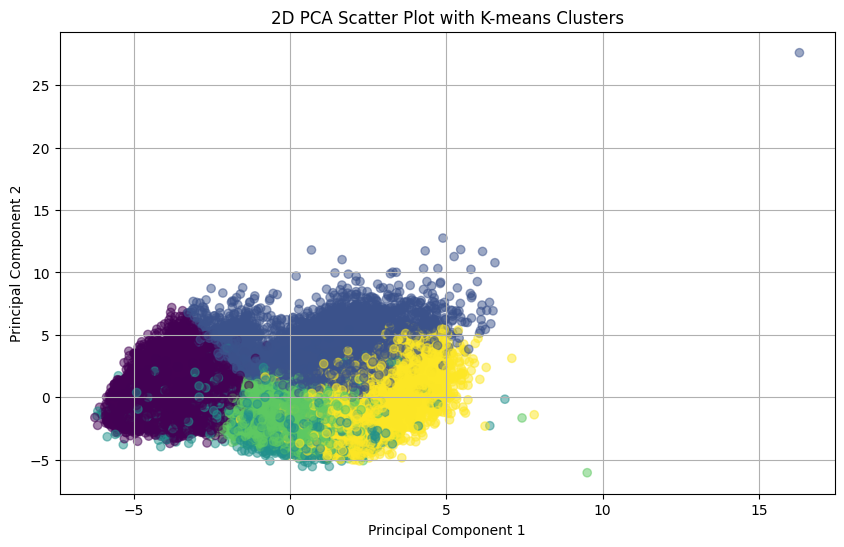

In [80]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmn_5_labels, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot with K-means Clusters')
plt.grid(True)
plt.show()


## Scatter plot based on optimum value of k from silhouette score

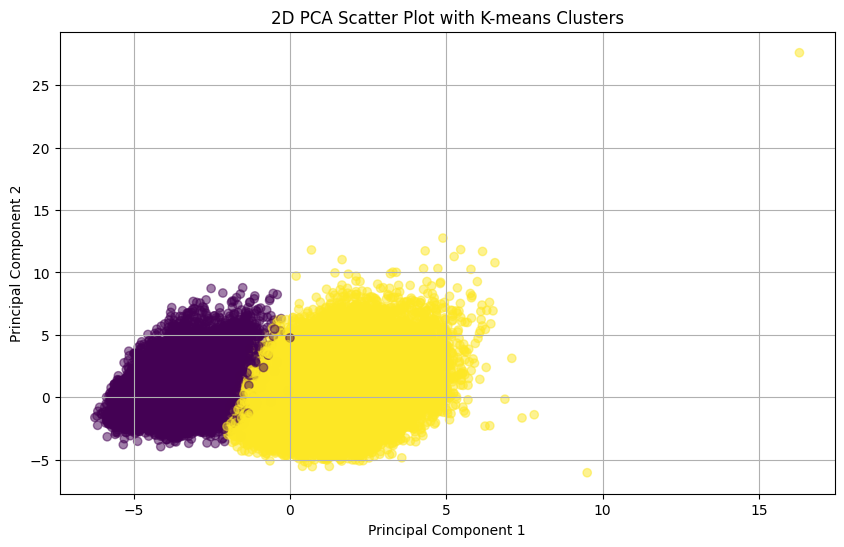

In [81]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmn_2_labels, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot with K-means Clusters')
plt.grid(True)
plt.show()

## Summary of Results and Business Interpretation

- What transformations did you apply to the raw dataset?

Here, we have:
(a) removed the rows of data which have missing data 
(b) applied PCA to get the key components which can be used for clustering. We used PCA because using the features directly was giving low silhouette scores.

- What were different k's chosen? What were the differences in the output with those different k's? Why did you choose this k and distance metric?


We choose 5 k's - 2, 3, 4, 5, 6. The differences in the outputs can be interpreted from the silhouette scores:
k = 2, silhouette score = 0.20
k = 3, silhouette score = 0.19
k = 4, silhouette score = 0.18
k = 5, silhouette score = 0.17
k = 6, silhouette score = 0.17

Note that based on the elbow curve, the best k value is 5, which does not match with the highest silhouette score of 0.20 for k = 2. This is because the elbow curve and silhouette scores use different optimization goals. The elbow Method focuses on minimizing within-cluster variance. The silhouette Score focuses on maximizing cluster separation and cohesion.

Based on the silhouette score, we select the best value for k = 2. The fact that the two clusters are distinct can be clearly seen from the scatter plots drawn above.

- What are the influential features? Are there any inferences you can draw that would be relevant from a business context about the different groups?

The influencing factor can be interpreted from the table 'summary_stats' as printed above. For example, the features AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR are important since they have relatively high mean values. Hence, these features can be considered important from the business point of view.
